합성곱 신경망은 2차원 구조를 그대로 사용해서 이미지 처리 분야에 뛰어난 성능을 발휘함.

In [2]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu')

입력 배열 주위에 가상의 원소를 채우는 것을 '패딩'이라 함.
입력과 특성맵의 크기를 동일하게 만들어 주기 위해 채워주는 건 '세임 패딩(same padding)'이라고 함. 그냥 하는건 '밸리드 패딩(Valid padding)'임.
커널이 필터를 찍을 횟수를 늘려주기 위해서 시행. (출력의 크기도 조절 가능)

In [3]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')

한칸씩 이동해서 찍어내는 것 말고 두칸 이상씩 이동해서 찍어내는 방법의 이동 크기를 '스트라이드(stride)'라고 함. 1보다 큰 스트라이드를 사용하는 경우는 드묾.

In [4]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', strides=1)

'풀링(pooling)'은 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행함. 풀링에는 가중치가 없음. 도장찍는 영역의 최댓값이나 평균을 넘김.(최대풀링, 평균풀링)

In [5]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1)/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [8]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

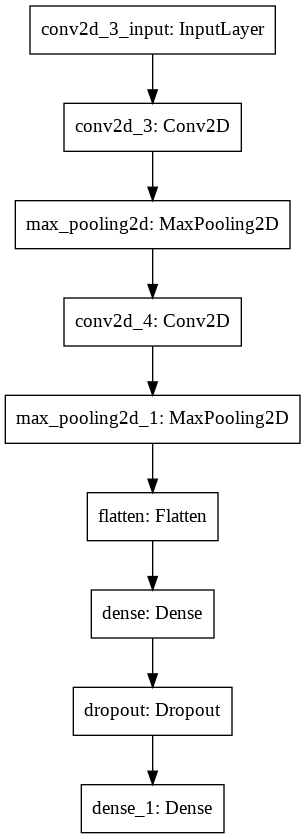

In [10]:
keras.utils.plot_model(model)

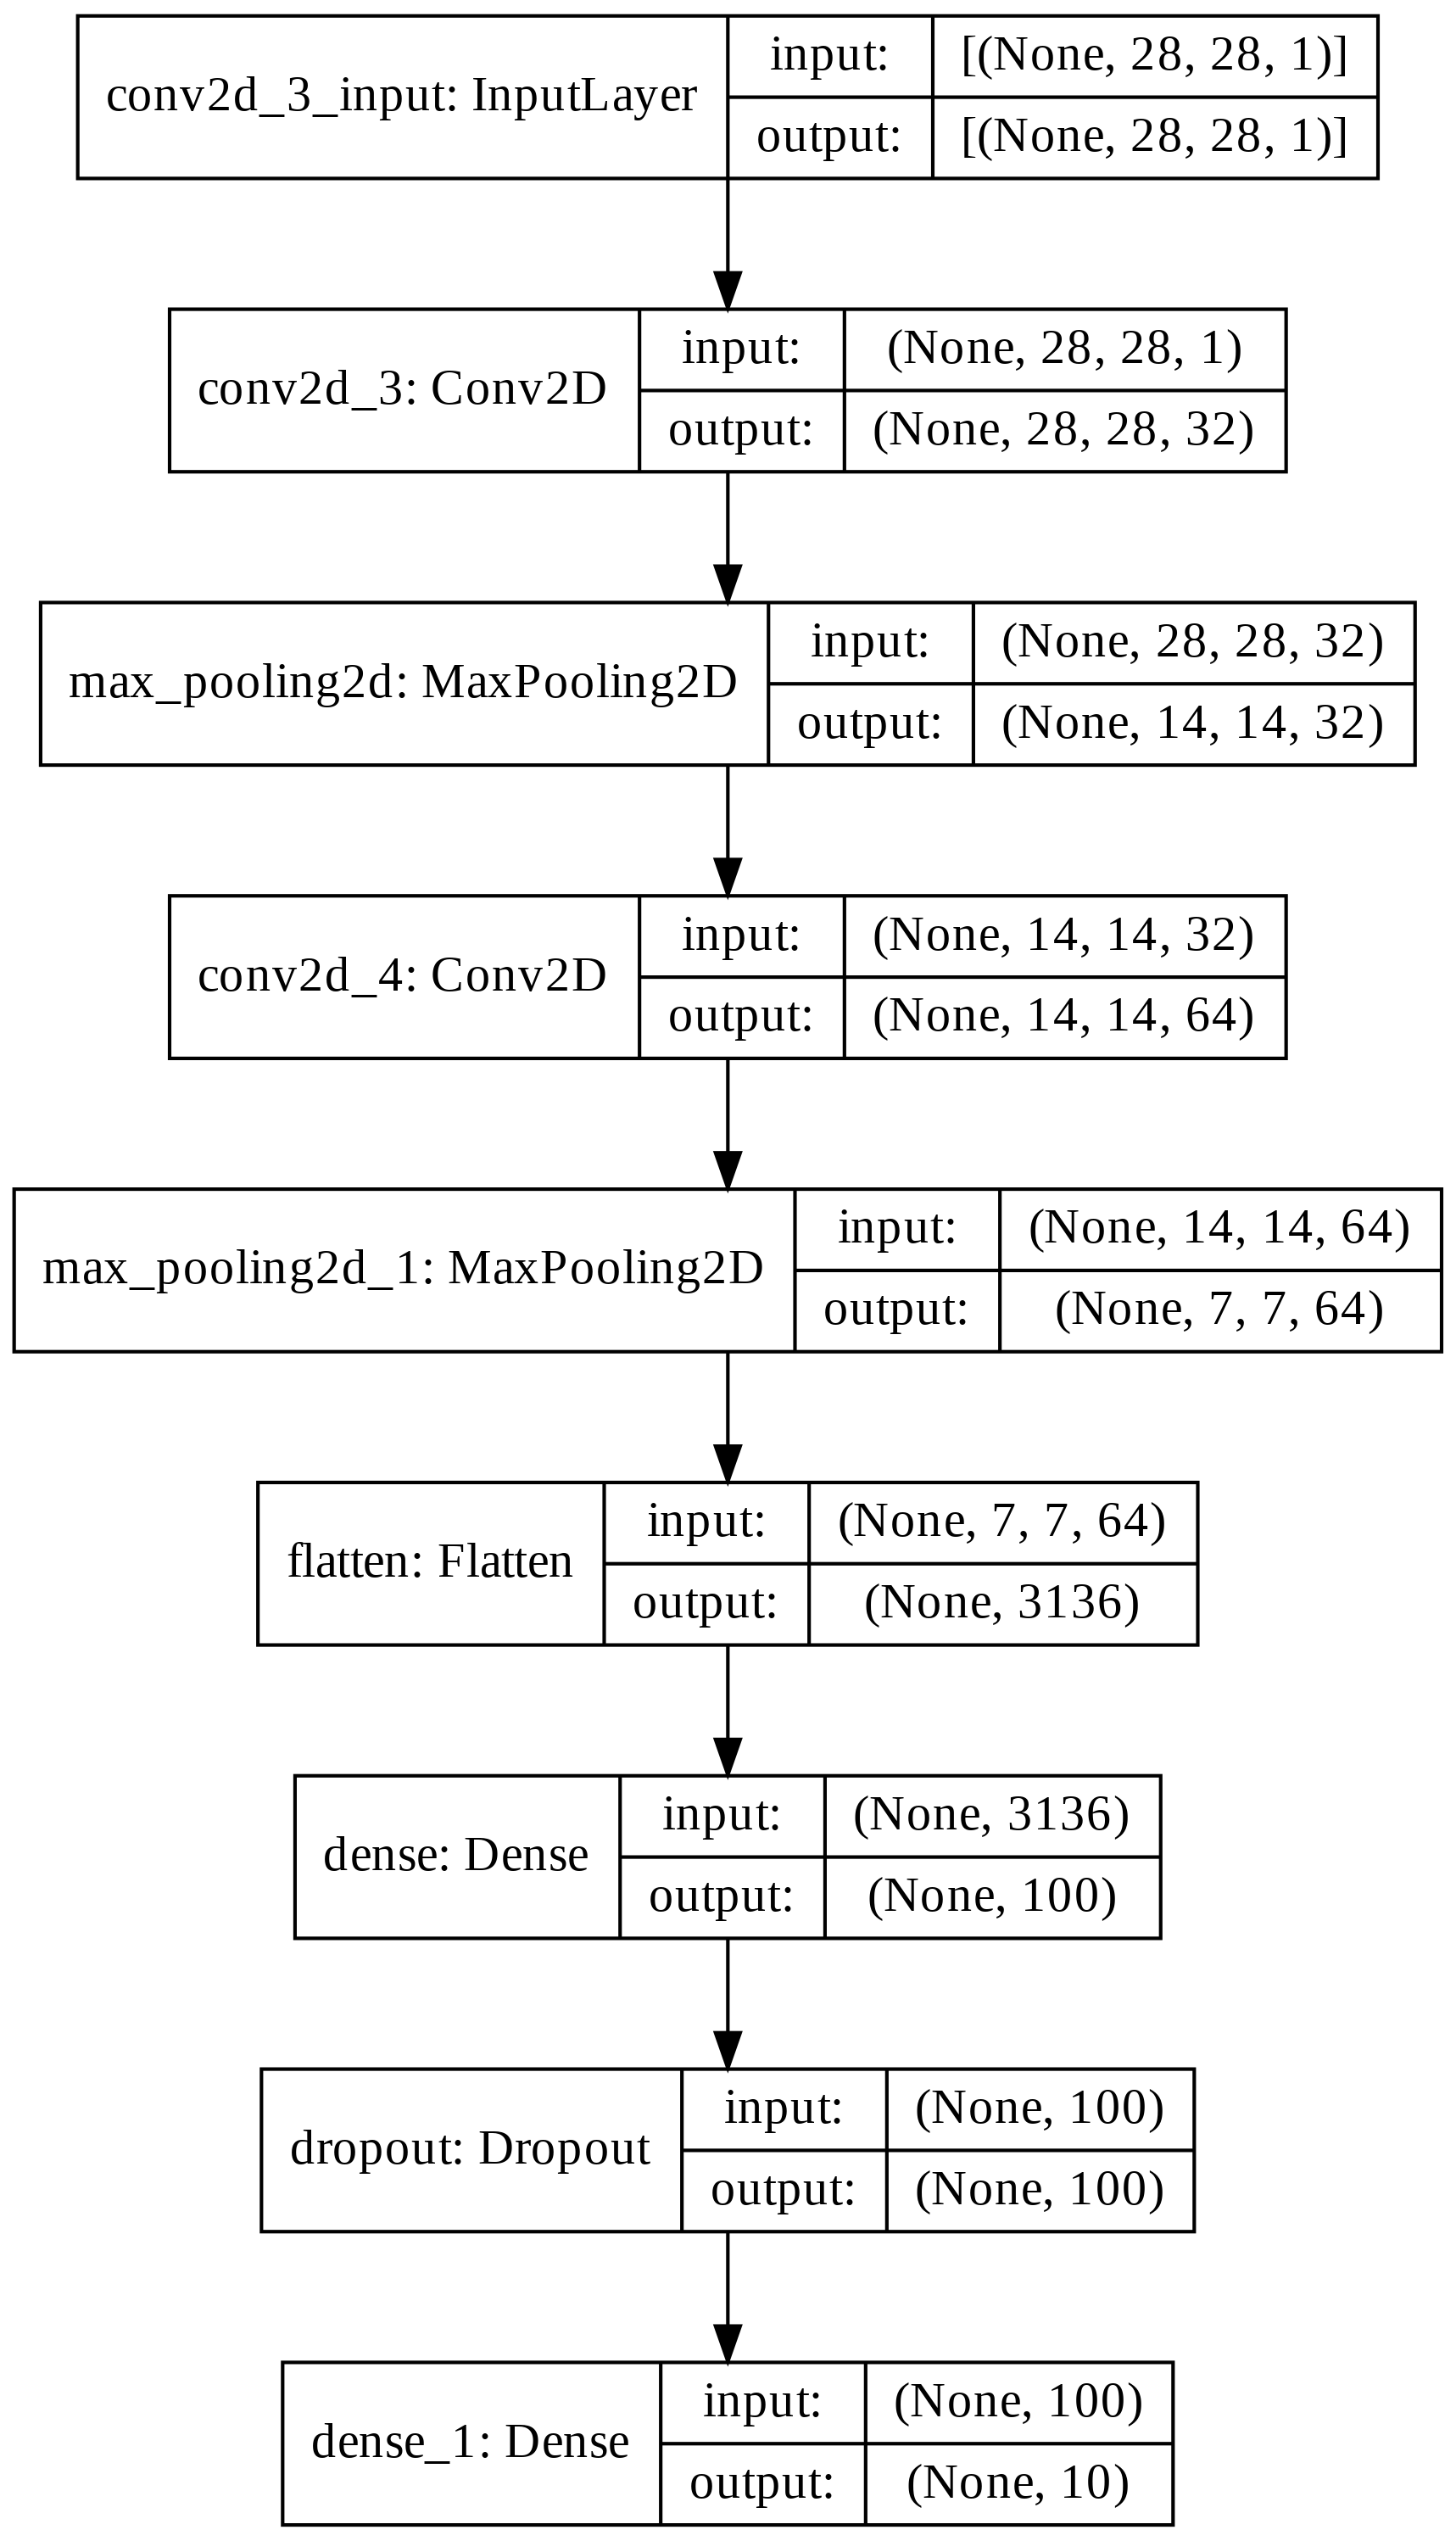

In [11]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn_architecture.png', dpi=300)

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 66s 43ms/step - loss: 0.5341 - accuracy: 0.8089 - val_loss: 0.3213 - val_accuracy: 0.8822
Epoch 2/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.3465 - accuracy: 0.8766 - val_loss: 0.2712 - val_accuracy: 0.8995
Epoch 3/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2937 - accuracy: 0.8940 - val_loss: 0.2531 - val_accuracy: 0.9049
Epoch 4/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2601 - accuracy: 0.9068 - val_loss: 0.2343 - val_accuracy: 0.9108
Epoch 5/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2390 - accuracy: 0.9110 - val_loss: 0.2366 - val_accuracy: 0.9139
Epoch 6/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2187 - accuracy: 0.9198 - val_loss: 0.2280 - val_accuracy: 0.9176
Epoch 7/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2028 - accuracy: 0.9253 - val_loss: 0.2164 -

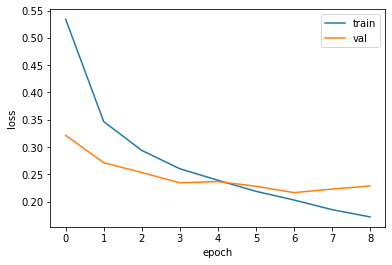

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 11ms/step - loss: 0.2164 - accuracy: 0.9212


[0.21635839343070984, 0.9212499856948853]

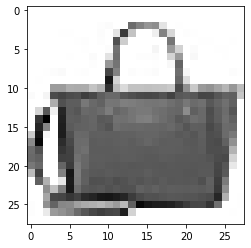

In [15]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [16]:
pred = model.predict(val_scaled[0:1])
print(pred)

[[5.1801426e-15 3.7591107e-19 2.1457950e-18 2.0779936e-16 6.5168088e-17
  2.4339062e-12 2.1541689e-14 2.8957260e-12 1.0000000e+00 4.3382568e-14]]


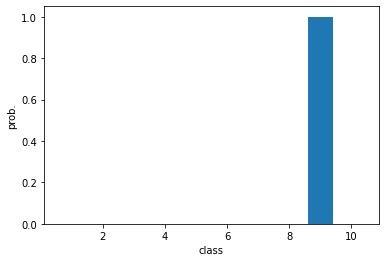

In [17]:
plt.bar(range(1,11), pred[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [18]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌들', '셔츠', '스니커즈', '가방', '앵클 부츠']

import numpy as np
print(classes[np.argmax(pred)])

가방


In [19]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2348 - accuracy: 0.9134


[0.23484988510608673, 0.9133999943733215]

In [20]:
model = keras.models.load_model('best-cnn-model.h5')

In [21]:
model.layers

In [22]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [23]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.026740696 0.26787868


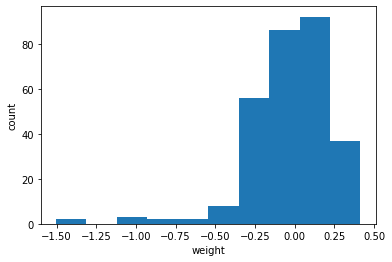

In [24]:
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

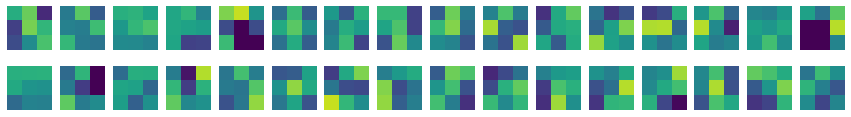

In [25]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [26]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu', padding='same', input_shape=(28,28,1)))

no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [27]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0027885572 0.08074017


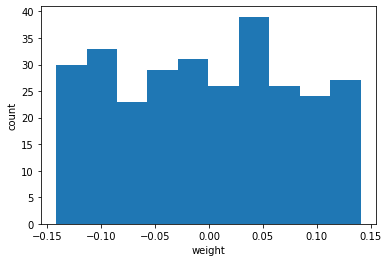

In [28]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

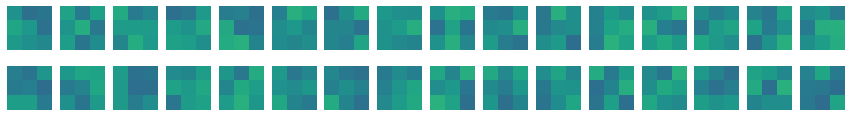

In [29]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

케라스 Sequential 클래스로는 입력을 2개 이상, 출력을 2개 이상 할 수 없다. 이럴 때 함수형 API를 사용한다. 함수형 API를 사용하려면 케라스의 Model 클래스를 쓰면 된다.

In [30]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_3_input'), name='conv2d_3_input', description="created by layer 'conv2d_3_input'")


In [31]:
conv_acti = keras.Model(model.input, model.layers[0].output)

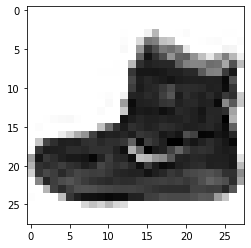

In [35]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [36]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv_acti.predict(inputs)

print(feature_maps.shape)

(1, 28, 28, 32)


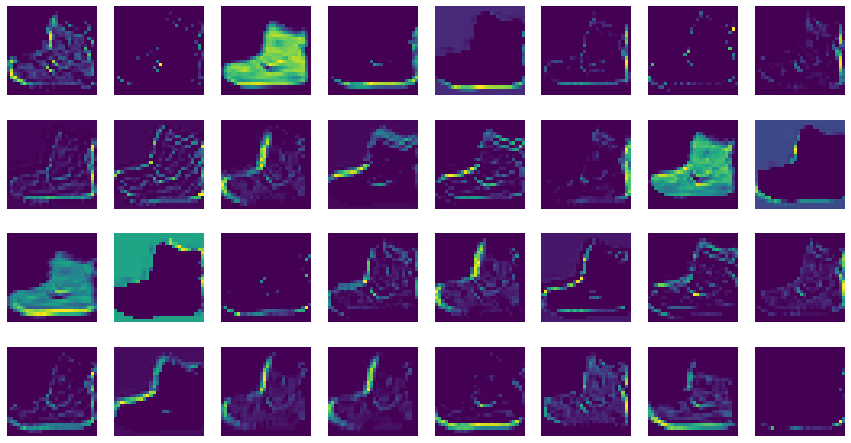

In [39]:
fig, axs = plt.subplots(4,8,figsize = (15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [40]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)

(1, 14, 14, 64)


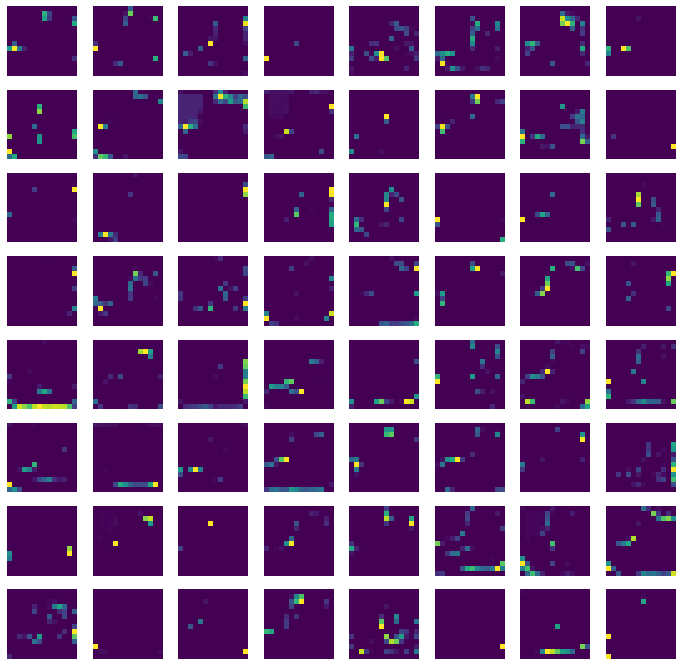

In [41]:
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()